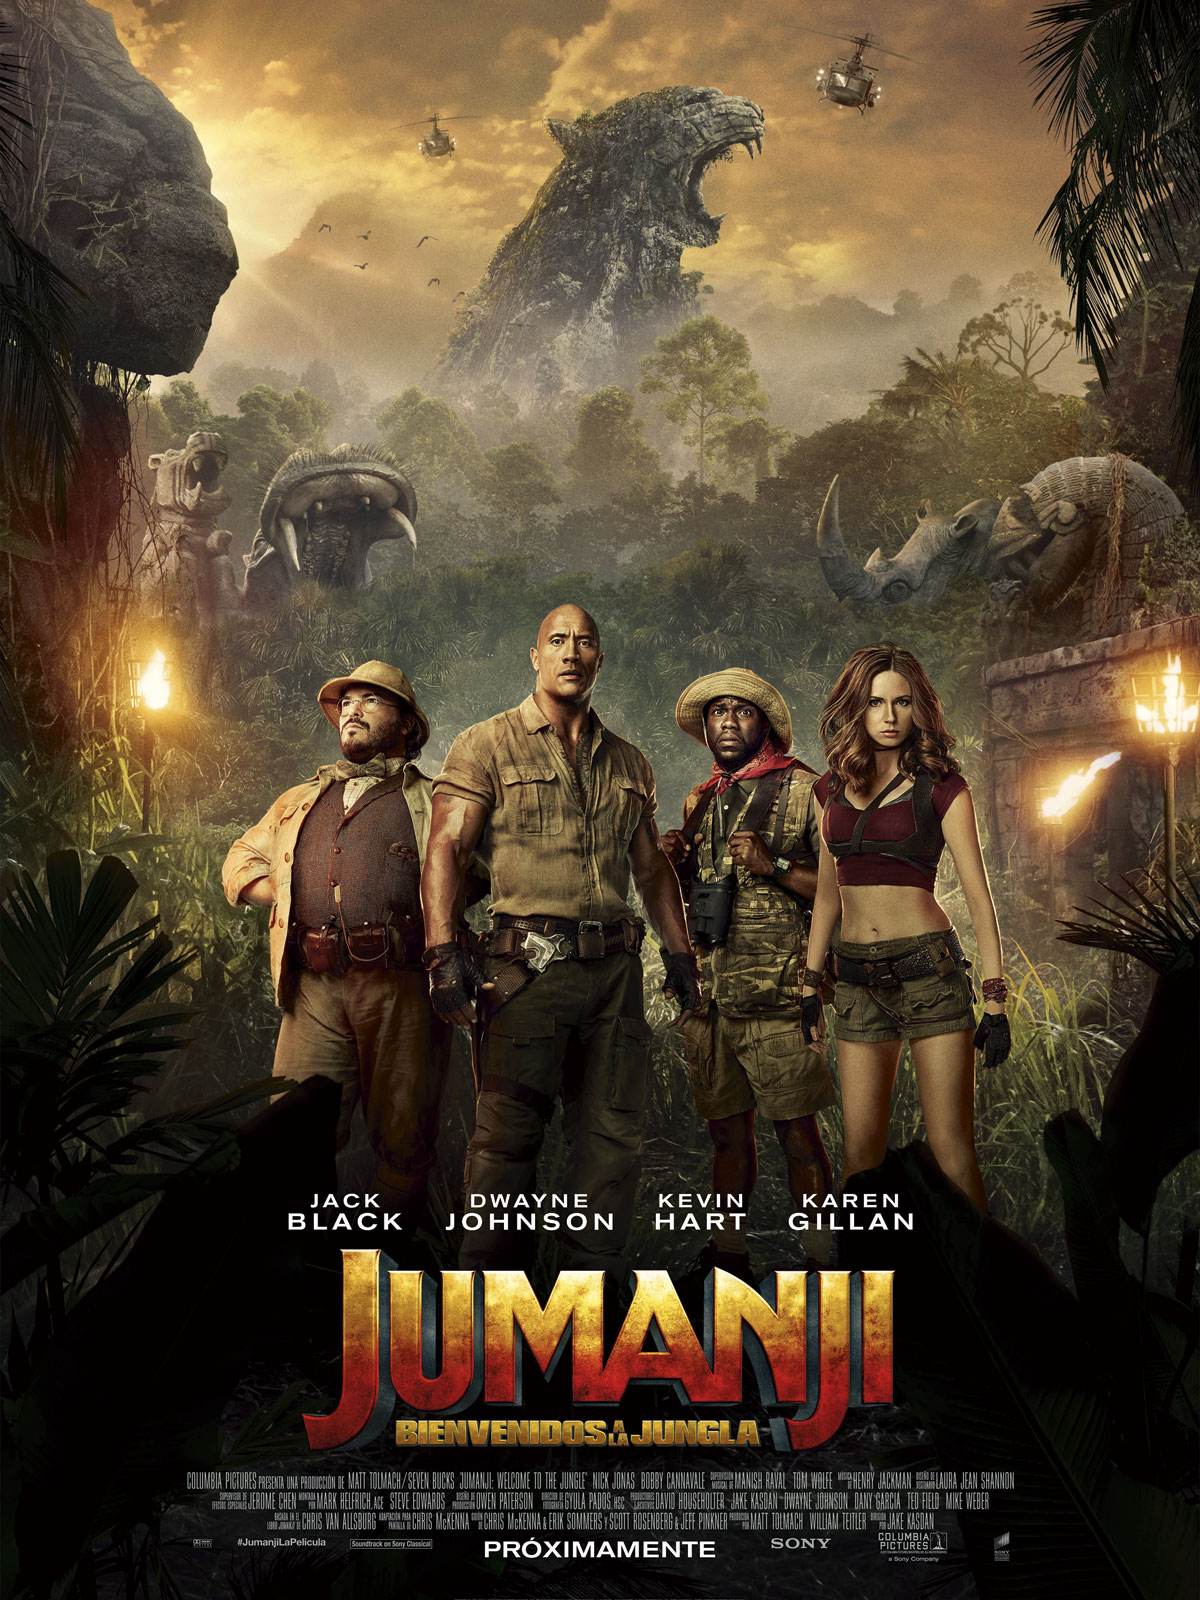

# Ejercicio Jumanji - Bienvenidos a la jungla

Wellcome to Jumanji dear adventurers. Unfortunately not everything are good news, some players have been playing to the game and, as a result of they dumb plays, a stampede of cats and dogs is now running in the real world.

As a fellow explorer I am sure that you understand the urgency of the situation. To solve it, we need to create a computer vision algorithm using CNNs to detect the cats and the dogs.

In order to do so we require the following steps:

- Create an image preprocessing pipeline to treat the images that we are providing. Perform data augmentation over the dataset, at least rotations.

- Test several architechtures (at least 3) and evaluate their performance over the dataset.

- Visualize the feature maps of some of the early and late layers of the models developed. ¿Is there any feature which could be explained through them?

- Finally select the model which performs the best over the whole dataset and explain why.

Fellow adventurer, thanks for your time, Jumanji will not forget your efforts.

In [6]:
import random 
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import random
import os
import tensorflow.keras as keras
from torch.utils.data import random_split
from glob import glob
from sklearn.model_selection import train_test_split
import shutil

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2022-01-09 10:37:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  71.5MB/s    in 0.9s    

2022-01-09 10:37:46 (71.5 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered

In [5]:
base_dir = '/content/cats_and_dogs_filtered/'

#directorios con las imágenes de train
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#directorios con las imágenes de validation
validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('Total train images - cats:', len(os.listdir(train_cats_dir ) ))
print('Total train images - dogs:', len(os.listdir(train_dogs_dir ) ))

print('Total validation images - cats:', len(os.listdir( validation_cats_dir ) ))
print('Total validation images - dogs:', len(os.listdir( validation_dogs_dir ) ))

Total train images - cats: 1000
Total train images - dogs: 1000
Total validation images - cats: 500
Total validation images - dogs: 500


In [7]:
#Dividimos la carpeta "validation" en test y valid para cats
data = os.listdir(validation_cats_dir)

test_cats, valid_cats = train_test_split(data, test_size=0.5, random_state=42)
print(f'Images in test - cats: '+ str(len(test_cats)))
print(f'Images in valid - cats: '+ str(len(valid_cats)))

#Dividimos la carpeta "validation" en test y valid para dogs
data1 = os.listdir(validation_dogs_dir)

test_dogs, valid_dogs = train_test_split(data1, test_size=0.5, random_state=42)
print(f'Images in test - dogs: '+ str(len(test_dogs)))
print(f'Images in valid - dogs: '+ str(len(valid_dogs)))

Images in test - cats: 250
Images in valid - cats: 250
Images in test - dogs: 250
Images in valid - dogs: 250


In [8]:
#Creamos nuevas carpetas para cats
split_path = '/content/cats_and_dogs_filtered/test/cats'
os.makedirs(split_path, exist_ok=True)

split_path1 = '/content/cats_and_dogs_filtered/valid/cats'
os.makedirs(split_path1, exist_ok=True)

#Creamos nuevas carpestas para dogs
split_path2 = '/content/cats_and_dogs_filtered/test/dogs'
os.makedirs(split_path2, exist_ok=True)

split_path3 = '/content/cats_and_dogs_filtered/valid/dogs'
os.makedirs(split_path3, exist_ok=True)

In [9]:
#Movemos las imágenes de CATS a la carpeta TEST
contador = 0

for fname in os.listdir('cats_and_dogs_filtered/validation/cats'):
  if contador == 500:
    break
  else:
    contador = contador+1
  shutil.move(f"cats_and_dogs_filtered/validation/cats/{fname}", f"cats_and_dogs_filtered/test/cats/{fname}") 
  
  print(fname)

cat.2427.jpg
cat.2228.jpg
cat.2343.jpg
cat.2270.jpg
cat.2151.jpg
cat.2264.jpg
cat.2156.jpg
cat.2302.jpg
cat.2183.jpg
cat.2093.jpg
cat.2059.jpg
cat.2038.jpg
cat.2282.jpg
cat.2200.jpg
cat.2122.jpg
cat.2289.jpg
cat.2150.jpg
cat.2325.jpg
cat.2165.jpg
cat.2220.jpg
cat.2089.jpg
cat.2329.jpg
cat.2002.jpg
cat.2496.jpg
cat.2163.jpg
cat.2379.jpg
cat.2177.jpg
cat.2298.jpg
cat.2415.jpg
cat.2117.jpg
cat.2334.jpg
cat.2330.jpg
cat.2143.jpg
cat.2311.jpg
cat.2187.jpg
cat.2398.jpg
cat.2140.jpg
cat.2346.jpg
cat.2439.jpg
cat.2479.jpg
cat.2218.jpg
cat.2248.jpg
cat.2058.jpg
cat.2087.jpg
cat.2295.jpg
cat.2388.jpg
cat.2005.jpg
cat.2445.jpg
cat.2018.jpg
cat.2354.jpg
cat.2486.jpg
cat.2316.jpg
cat.2206.jpg
cat.2335.jpg
cat.2481.jpg
cat.2376.jpg
cat.2413.jpg
cat.2222.jpg
cat.2361.jpg
cat.2351.jpg
cat.2072.jpg
cat.2160.jpg
cat.2031.jpg
cat.2464.jpg
cat.2149.jpg
cat.2106.jpg
cat.2092.jpg
cat.2111.jpg
cat.2173.jpg
cat.2367.jpg
cat.2493.jpg
cat.2056.jpg
cat.2134.jpg
cat.2306.jpg
cat.2468.jpg
cat.2012.jpg
cat.2478.jpg

In [10]:
#Movemos las imágenes de DOGS a la carpeta TEST
contador = 0

for fname in os.listdir('cats_and_dogs_filtered/validation/dogs'):
  if contador == 500:
    break
  else:
    contador = contador+1
  shutil.move(f"cats_and_dogs_filtered/validation/dogs/{fname}", f"cats_and_dogs_filtered/test/dogs/{fname}") 
  
  #print(fname)

In [11]:
#Movemos las imágenes de CATS a la carpeta VALID
contador = 0

for fname in os.listdir('cats_and_dogs_filtered/validation/cats'):
  if contador == 500:
    break
  else:
    contador = contador+1
  shutil.move(f"cats_and_dogs_filtered/validation/cats/{fname}", f"cats_and_dogs_filtered/valid/cats/{fname}") 
  
  print(fname)

In [ ]:
#Movemos las imágenes de DOGS a la carpeta VALID
contador = 0

for fname in os.listdir('cats_and_dogs_filtered/validation/cats'):
  if contador == 500:
    break
  else:
    contador = contador+1
  shutil.move(f"cats_and_dogs_filtered/validation/cats/{fname}", f"cats_and_dogs_filtered/valid/cats/{fname}") 
  
  print(fname)

In [13]:
#Copiamos la carpeta VALID para usar data augmentation en una de ellas
  
src_path = 'cats_and_dogs_filtered/valid' 
dest_path = 'cats_and_dogs_filtered/valid_2'
   
destination = shutil.copytree(src_path, dest_path)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img,image_dataset_from_directory
import matplotlib.pyplot as plt
image_size = (500, 500)
batch_size = 32

train_ds = image_dataset_from_directory(
    "cats_and_dogs_filtered/train/",
    image_size=image_size,
    batch_size=batch_size,
    crop_to_aspect_ratio = True,
)


validation_ds = image_dataset_from_directory(
    "cats_and_dogs_filtered/validation/",
    image_size=image_size,
    batch_size=batch_size,
    crop_to_aspect_ratio = True,
)


#print(list(train_ds.as_numpy_iterator()))
#train_ds

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
def show_images_df(class_names,train_ds,range_img):
  plt.figure(figsize=(35,35))

  for images, labels in train_ds.take(1):
    for i in range(range_img):
      ax = plt.subplot(4, 4, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

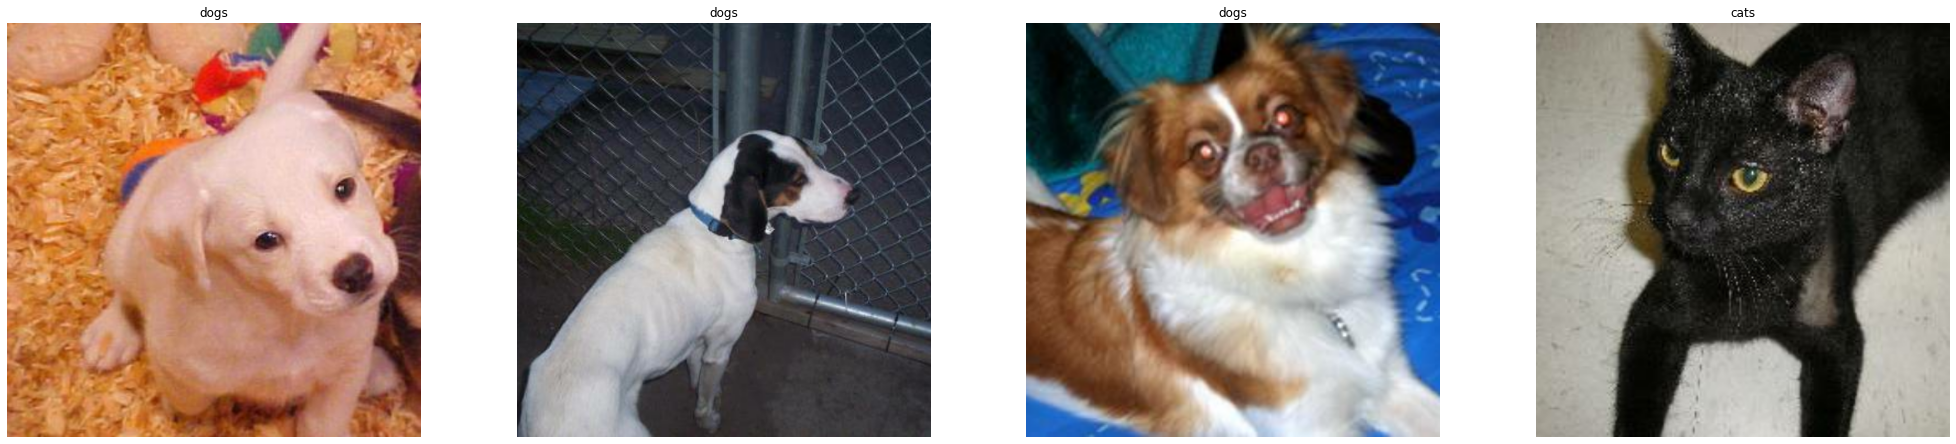

In [ ]:
show_images_df(train_ds.class_names,train_ds,4)

In [ ]:
# Funciones data augmentation

def data_aug(entry, i): # i = [ (0:rotation) , (1:blur) , (2:grises) , (3:bajo brillo) ]
    if i==0:
        return entry.rotate(random.randint(-45, 45))
    if i==1:
        return entry.filter(ImageFilter.BLUR)
    if i==2:
        return ImageOps.grayscale(entry)
    if i==3:
        return ImageEnhance.Brightness(entry).enhance(0.4)

In [ ]:
# Selección aleatoria de ¿30%? de muestras del total para cada tipo de data augmentation,
# por separado, así algunas se combinarán entre ellas.


n = 30  # % de muestras modificadas

for i in range(0,4):  # i = [ (0:rotation) , (1:blur) , (2:grises) , (3:bajo brillo) ]
    randomlist = random.sample(range( 0, len(train_ds.take(2000))), (n*len(train_ds.take(2000)))//100 )
    print(randomlist)
    for q in randomlist:
      pass
      #train_ds.iloc[q] = data_aug(train_ds.iloc[q], i)

dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.map(lambda x: x*2)
list(dataset.as_numpy_iterator())


[39, 58, 7, 56, 28, 46, 25, 60, 29, 43, 14, 49, 55, 1, 62, 35, 40, 53]
[19, 2, 37, 59, 26, 28, 52, 23, 30, 22, 56, 3, 4, 46, 32, 55, 24, 9]
[58, 50, 61, 16, 47, 9, 15, 43, 45, 6, 36, 4, 17, 59, 20, 52, 54, 40]
[62, 17, 11, 51, 32, 41, 49, 4, 25, 60, 58, 38, 23, 31, 26, 27, 33, 30]


NameError: ignored

In [ ]:
test = []
for i in train_ds.as_numpy_iterator():
  test.append(i)





In [ ]:
import tensorflow as tf

train_array = tf.as_numpy(train_ds)


AttributeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

tf.Tensor(
[[[[123.       135.        95.      ]
   [123.       135.625     93.75    ]
   [118.875    132.25      87.      ]
   ...
   [109.25     101.375     68.125   ]
   [ 90.875     86.        52.375   ]
   [ 99.        96.        63.      ]]

  [[127.375    139.375     99.375   ]
   [132.0625   144.6875   102.8125  ]
   [129.34375  142.48438   97.9375  ]
   ...
   [114.328125 108.40625   74.296875]
   [ 93.84375   90.453125  56.203125]
   [ 93.375     92.25      58.625   ]]

  [[126.25     138.25      98.25    ]
   [133.98438  146.14062  104.5     ]
   [132.39062  144.92188  101.3125  ]
   ...
   [116.15625  112.765625  77.765625]
   [ 98.203125  97.203125  62.203125]
   [ 91.875     93.375     59.      ]]

  ...

  [[165.125    164.125    160.125   ]
   [154.1875   153.1875   149.1875  ]
   [148.04688  145.17188  143.42188 ]
   ...
   [167.14062  168.14062  162.51562 ]
   [164.       165.       159.      ]
   [159.625    160.625    154.625   ]]

  [[158.75     157.75     153.75  

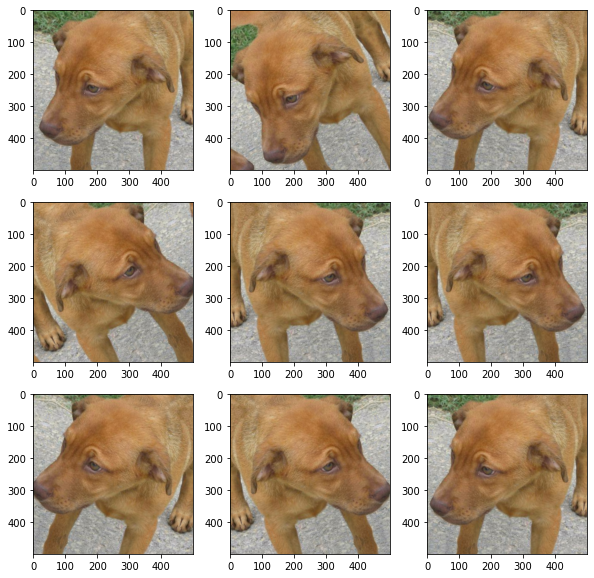

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        #print(augmented_images[0].numpy().astype("uint8"))